# I) Modèle SIR Euler Method



In [24]:
import numpy as np
import matplotlib.pyplot as plt


beta=0.58
gamma=1/10

def SIR(i0,N,nbjours):


    # Creation of lists
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    # Initial Condition
    I[0]=i0
    S[0]=N-i0

    #Propagation
    for i in range(nbjours-1):
        S[i+1]=S[i]-beta*I[i]*S[i]/N
        I[i+1]=I[i]+beta*I[i]*S[i]/N - gamma*I[i]
        R[i+1]=R[i]+gamma*I[i]

    return S,I,R

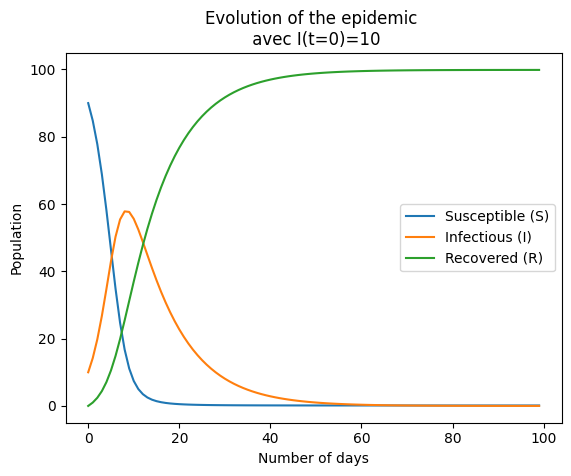

In [ ]:
S,I,R=SIR(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n avec I(t=0)={int(I[0])}")
plt.legend()
plt.show()

# II) Modèle SEIRD Euler Method

In [ ]:


def seird_model(i0, N, nbday, beta, sigma, gamma, mu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]

    return S, E, I, R, D



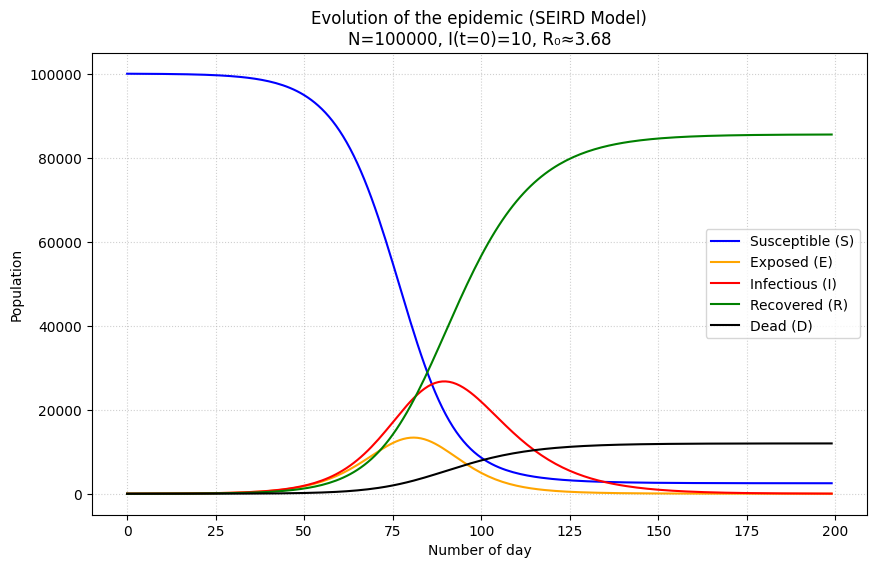

In [ ]:
# 1. Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

# Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

# 2. Run the SEIRD simulation
S, E, I, R, D = seird_model(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()



```
# This is formatted as code
```

#III) SIR Model RK2


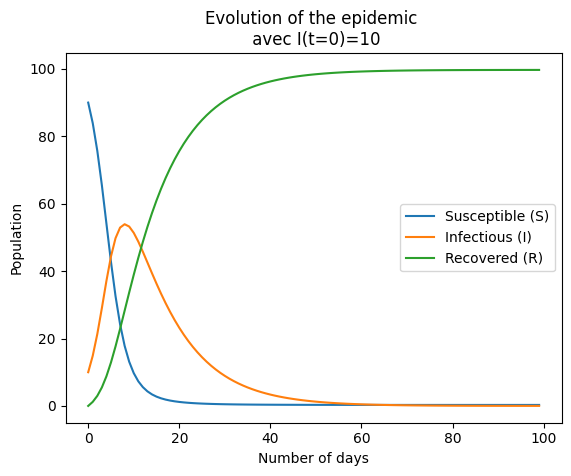

In [11]:

def SIRK2(i0,N,nbjours):

  dt = 1
  # Creation of lists
  S=np.zeros(nbjours)
  I=np.zeros(nbjours)
  R=np.zeros(nbjours)

  # Initial Condition
  I[0]=i0
  S[0]=N-i0
  for i in range(nbjours - 1):
      #k1
      k1_S = (-beta * S[i] * I[i]) / N * dt
      k1_I = ((beta * S[i] * I[i]) / N - gamma * I[i] ) * dt
      k1_R = gamma * I[i] * dt

      #Un + k1

      S_k1 = S[i] + k1_S
      I_k1 = I[i] + k1_I
      R_k1 = R[i] + k1_R

      #k2
      k2_S = (-beta * S_k1 * I_k1) / N * dt
      k2_I = (beta * S_k1 * I_k1) / N - gamma * I_k1 * dt
      k2_R = gamma * I_k1 * dt

      #Un+1
      S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
      I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
      R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

  return S, I, R


S,I,R=SIRK2(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n avec I(t=0)={int(I[0])}")
plt.legend()
plt.show()


In [32]:

def SEIRDRK2(i0, N,nbjours, beta, sigma, gamma, mu, e0=0):

  dt = 1
  # Creation of lists
  S=np.zeros(nbjours)
  E=np.zeros(nbjours)
  I=np.zeros(nbjours)
  R=np.zeros(nbjours)
  D=np.zeros(nbjours)

 # Initial Condition
  I[0] = i0
  E[0] = e0
  R[0] = 0
  D[0] = 0
  S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N
  for i in range(nbjours - 1):
      #k1
      k1_S = (-beta * S[i] * I[i]) / N * dt
      k1_E = (beta * I[i] * S[i] / N - sigma * E[i] )  * dt
      k1_I = (sigma * E[i] - gamma * I[i] - mu * I[i]) * dt
      k1_R = gamma * I[i] * dt
      k1_D = mu * I[i] * dt

      #Un + k1

      S_k1 = S[i] + k1_S
      E_k1 = E[i] + k1_E
      I_k1 = I[i] + k1_I
      R_k1 = R[i] + k1_R
      D_k1 = D[i] + k1_D

      #k2
      k2_S = (-beta * S_k1 * I_k1) / N * dt
      k2_E = (beta * I_k1 *  S_k1 / N - sigma * E_k1)     * dt
      k2_I = ((beta * S_k1 * I_k1) / N - gamma * I_k1) * dt
      k2_R = gamma * I_k1 * dt
      k2_D = mu * I_k1 * dt

      #Un+1
      S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
      E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
      I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
      R[i+1] = R[i] + 0.5 * (k1_R + k2_R)
      D[i+1] = E[i] + 0.5 * (k1_D + k2_D)

  return S,E,I,R,D




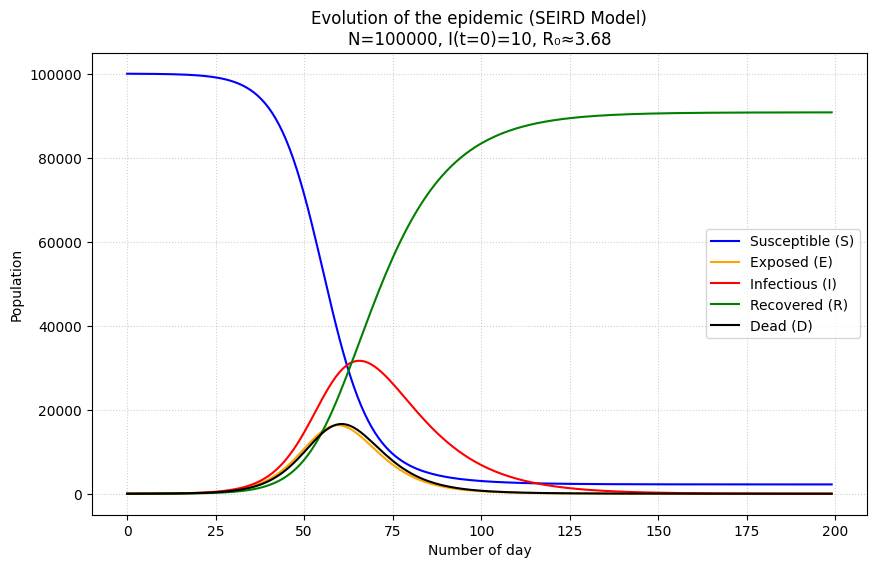

In [33]:
# 1. Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

# Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

# 2. Run the SEIRD simulation
S, E, I, R, D = SEIRDRK2(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()